In [618]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.linear_model import LinearRegression,Lasso,Ridge,LogisticRegression,LassoCV,RidgeCV
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.model_selection import train_test_split,learning_curve,GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score,confusion_matrix,classification_report,silhouette_score,roc_curve, auc, RocCurveDisplay,recall_score,roc_auc_score,davies_bouldin_score,f1_score,precision_recall_curve
from sklearn.datasets import make_classification,make_blobs
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, plot_tree,DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,BaggingClassifier,AdaBoostClassifier,IsolationForest,RandomForestRegressor,VotingClassifier
from sklearn.cluster import KMeans,DBSCAN
from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.spatial.distance import euclidean,cityblock,cosine
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris,load_digits
from mlxtend.frequent_patterns import apriori,association_rules
from scipy.stats import mode
from sklearn.neighbors import NearestNeighbors
import streamlit as st
import joblib
import warnings
from mpl_toolkits.mplot3d import Axes3D
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier
import plotly.express as px
from sklearn.utils import resample
warnings.filterwarnings('ignore')

In [501]:
df=pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Data Preprocessing and Cleansing

In [504]:
df.shape

(5110, 12)

In [505]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [506]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [507]:
df=df.dropna()
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [509]:
df.duplicated().sum()

0

In [511]:
df.nunique()

id                   4909
gender                  3
age                   104
hypertension            2
heart_disease           2
ever_married            2
work_type               5
Residence_type          2
avg_glucose_level    3852
bmi                   418
smoking_status          4
stroke                  2
dtype: int64

In [513]:
sorted(df['age'].unique().tolist())[0:13]

[0.08, 0.16, 0.24, 0.32, 0.4, 0.48, 0.56, 0.64, 0.72, 0.8, 0.88, 1.0, 1.08]

In [516]:
df['age']=np.ceil(df['age'])
sorted(df['age'].unique().tolist())[0:13]

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0]

In [519]:
df['gender'].value_counts()

gender
Female    2897
Male      2011
Other        1
Name: count, dtype: int64

In [522]:
df.drop(df[df['gender']=='Other'].index,inplace=True)
df['gender'].value_counts()

gender
Female    2897
Male      2011
Name: count, dtype: int64

In [524]:
df['stroke'].value_counts()

stroke
0    4699
1     209
Name: count, dtype: int64

In [526]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [528]:
df.drop(columns=['id'],inplace=True)

In [530]:
plt.style.use('dark_background')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'avg_glucose_level'}>],
       [<Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'stroke'}>]], dtype=object)

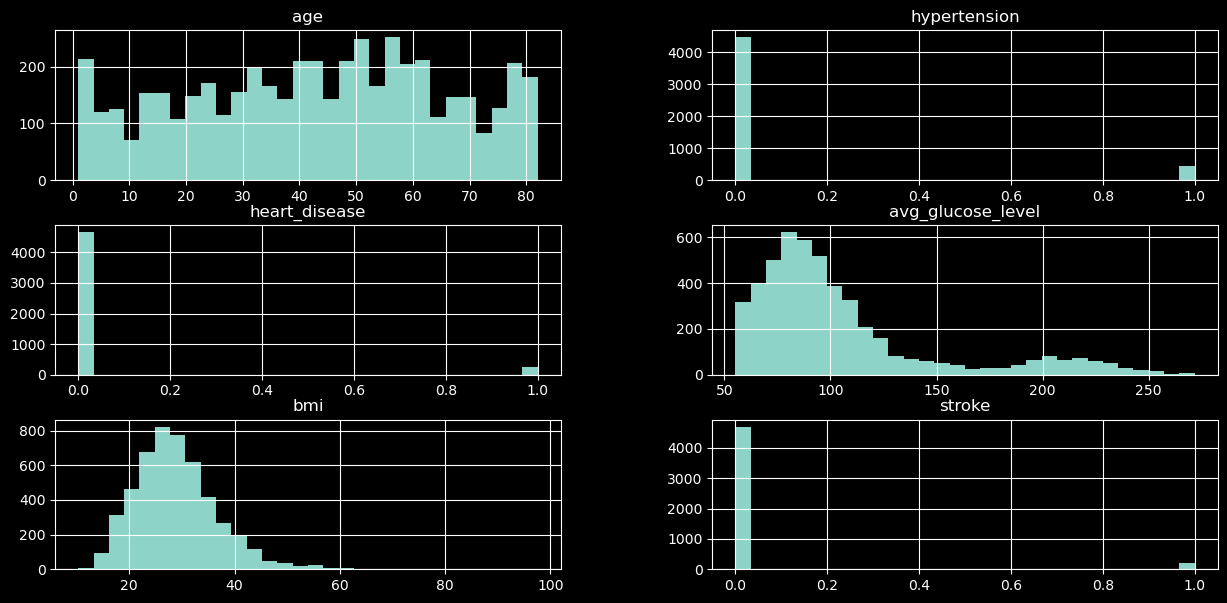

In [532]:
df.hist(bins=30,figsize=(15,7))

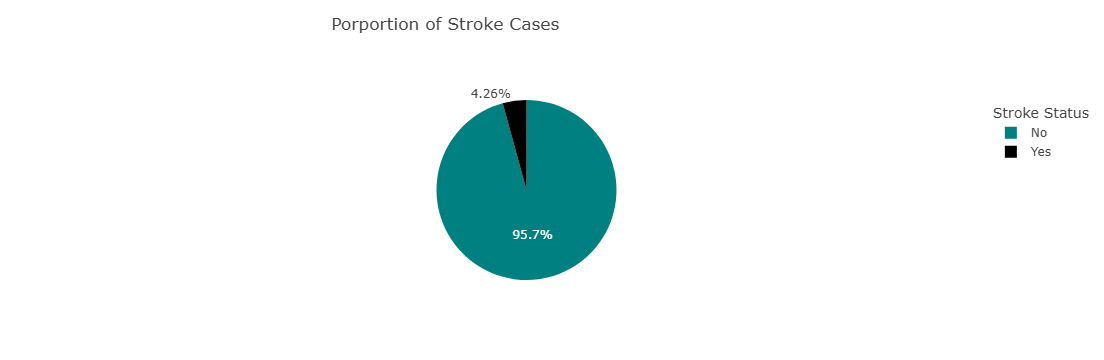

In [533]:
fig=px.pie(
    df['stroke'].value_counts(),values=df['stroke'].value_counts().values,names=['No','Yes'],
    title='Porportion of Stroke Cases',
    color_discrete_sequence=['#008080','black']
)
fig.update_layout(legend_title_text='Stroke Status',title_x=0.3,title_y=0.95)
fig.show()

In [536]:
stroke_data=df[df['stroke']==1]
non_stroke_data=df[df['stroke']==0]

In [538]:
stroke_data['bmi'].mean()

30.471291866028707

In [540]:
non_stroke_data['bmi'].mean()

28.82443072994254

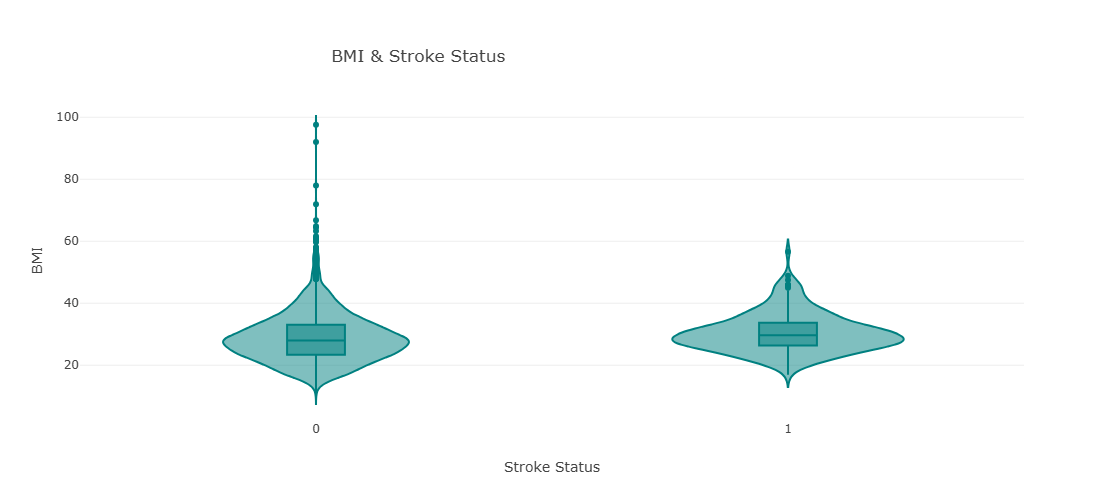

In [542]:
fig=px.violin(df,y='bmi',x='stroke',box=True,width=700,height=500,color_discrete_sequence=['#008080','black'],
             title='BMI & Stroke Status',labels={'stroke':'Stroke Status','bmi':'BMI'})
fig.update_layout(title_x=0.3,title_y=0.9)
fig.show()

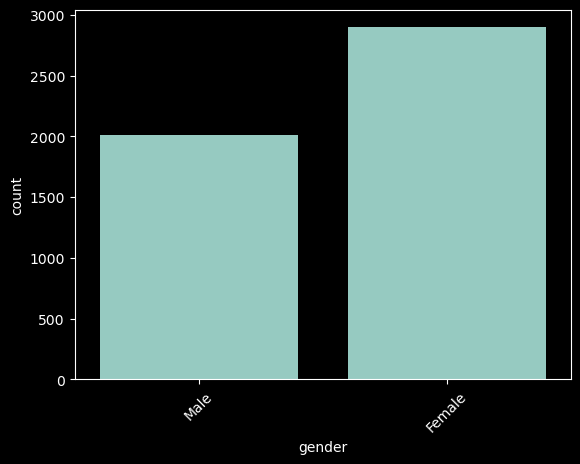

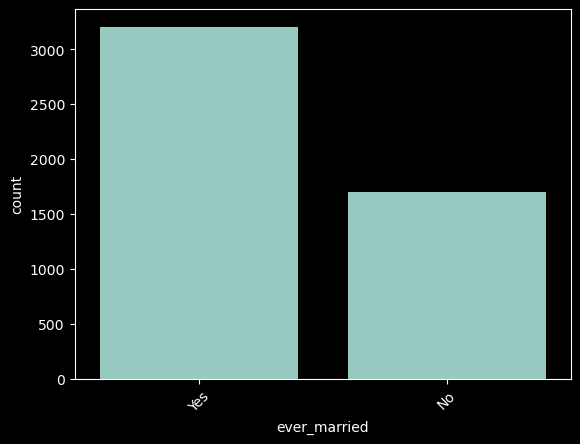

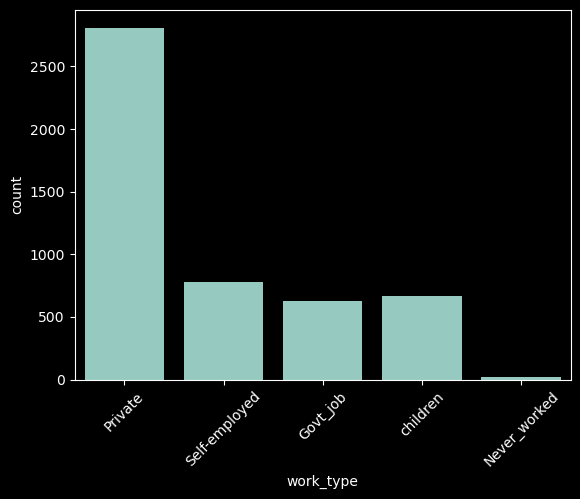

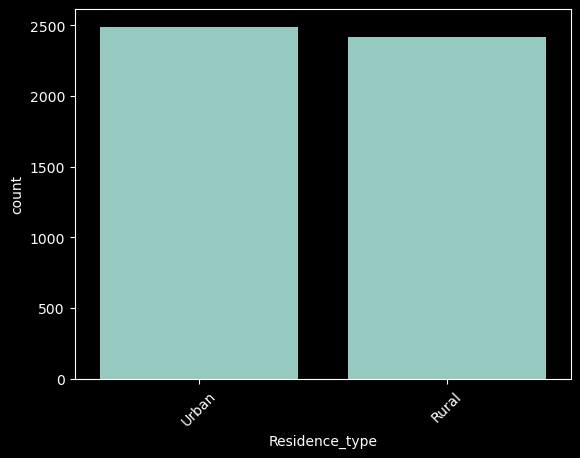

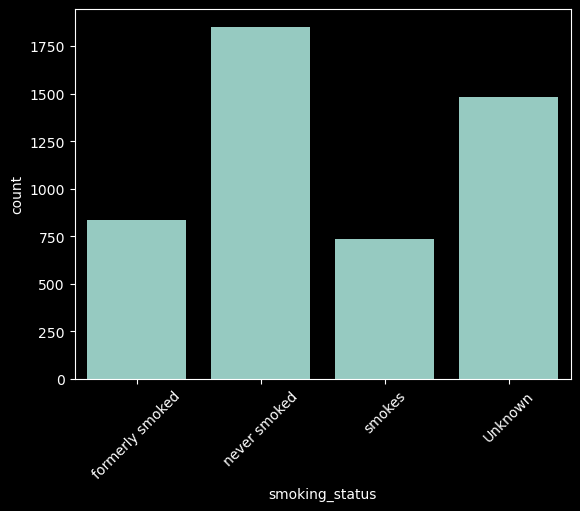

In [544]:
categorical=['gender','ever_married','work_type','Residence_type','smoking_status']
numeric_features = ["age", "avg_glucose_level", "bmi"] 
for col in categorical:
    sns.countplot(x=df[f'{col}'],data=df)
    plt.xticks(rotation=45)
    plt.show()

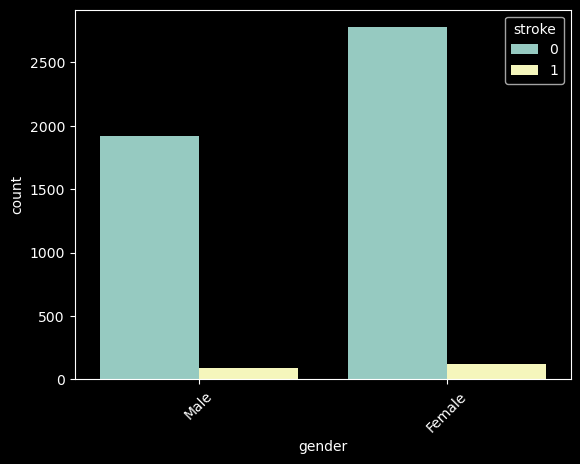

In [546]:
sns.countplot(x='gender',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

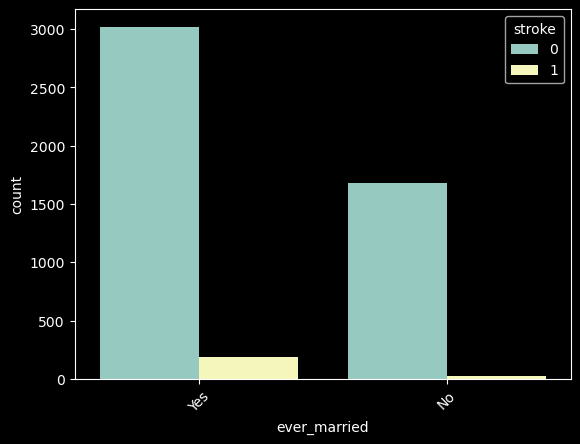

In [548]:
sns.countplot(x='ever_married',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

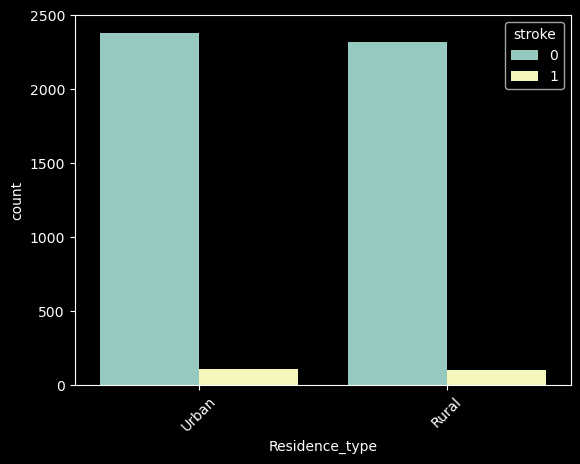

In [550]:
sns.countplot(x='Residence_type',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

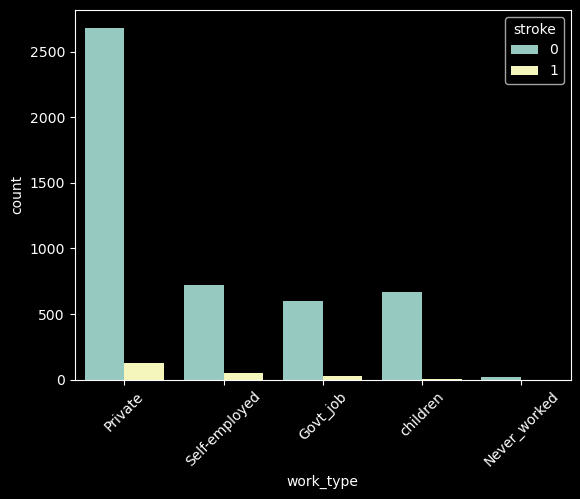

In [552]:
sns.countplot(x='work_type',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

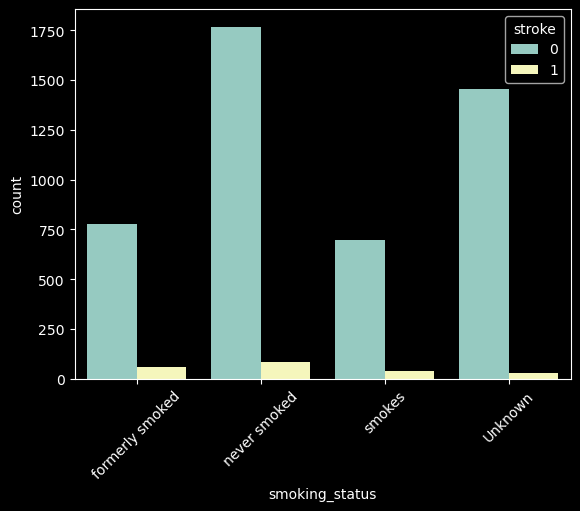

In [554]:
sns.countplot(x='smoking_status',hue='stroke',data=df)
plt.xticks(rotation=45)
plt.show()

In [556]:
df['smoking_status']=df['smoking_status'].replace('Unknown','No Info')

In [558]:
df['age_hyper']=df_linear['age']*df_linear['hypertension']
df["hyp_hd"] = df_linear["hypertension"] & df_linear["heart_disease"]

# Feature Scaling

In [561]:
df_linear=df.copy()
df_tree=df.copy()

In [563]:
scaler=StandardScaler()
df_linear[numeric_features]=scaler.fit_transform(df_linear[numeric_features])
df_linear

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_hyper,hyp_hd
0,Male,1.070411,0,1,Yes,Private,Urban,2.777797,0.981145,formerly smoked,1,0.00000,0
2,Male,1.647328,0,1,Yes,Private,Rural,0.014016,0.459086,never smoked,1,0.00000,0
3,Female,0.271604,0,0,Yes,Private,Urban,1.484266,0.701016,smokes,1,0.00000,0
4,Female,1.602950,1,0,Yes,Self-employed,Rural,1.549325,-0.623231,never smoked,1,1.60295,0
5,Male,1.691706,0,0,Yes,Private,Urban,1.821493,0.013426,formerly smoked,1,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,-1.326011,0,0,No,children,Rural,-0.049918,-1.310821,No Info,0,-0.00000,0
5106,Female,1.691706,0,0,Yes,Self-employed,Urban,0.448045,1.414072,never smoked,0,0.00000,0
5107,Female,-0.349691,0,0,Yes,Self-employed,Rural,-0.502181,0.217156,never smoked,0,-0.00000,0
5108,Male,0.360360,0,0,Yes,Private,Rural,1.373057,-0.419501,formerly smoked,0,0.00000,0


# Encoding

In [566]:
le=LabelEncoder()
for col in categorical:
    if col != 'smoking_status': 
        df_tree[f'{col}']=le.fit_transform(df_tree[f'{col}'])
        df_linear[f'{col}']=le.fit_transform(df_linear[f'{col}'])

In [568]:
ord=OrdinalEncoder(categories=[['No Info','never smoked','formerly smoked','smokes']])
df_tree['smoking_status']=ord.fit_transform(df_tree[['smoking_status']])
df_tree['smoking_status']
df_linear['smoking_status']=ord.fit_transform(df_linear[['smoking_status']])
df_linear['smoking_status']

0       2.0
2       1.0
3       3.0
4       1.0
5       2.0
       ... 
5104    0.0
5106    1.0
5107    1.0
5108    2.0
5109    0.0
Name: smoking_status, Length: 4908, dtype: float64

In [570]:
onehot=OneHotEncoder()
df_linear=pd.get_dummies(df_linear,columns=categorical,drop_first=False)
df_linear

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_hyper,hyp_hd,gender_0,gender_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0.0,smoking_status_1.0,smoking_status_2.0,smoking_status_3.0
0,1.070411,0,1,2.777797,0.981145,1,0.00000,0,False,True,...,False,True,False,False,False,True,False,False,True,False
2,1.647328,0,1,0.014016,0.459086,1,0.00000,0,False,True,...,False,True,False,False,True,False,False,True,False,False
3,0.271604,0,0,1.484266,0.701016,1,0.00000,0,True,False,...,False,True,False,False,False,True,False,False,False,True
4,1.602950,1,0,1.549325,-0.623231,1,1.60295,0,True,False,...,False,False,True,False,True,False,False,True,False,False
5,1.691706,0,0,1.821493,0.013426,1,0.00000,0,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.326011,0,0,-0.049918,-1.310821,0,-0.00000,0,True,False,...,False,False,False,True,True,False,True,False,False,False
5106,1.691706,0,0,0.448045,1.414072,0,0.00000,0,True,False,...,False,False,True,False,False,True,False,True,False,False
5107,-0.349691,0,0,-0.502181,0.217156,0,-0.00000,0,True,False,...,False,False,True,False,True,False,False,True,False,False
5108,0.360360,0,0,1.373057,-0.419501,0,0.00000,0,False,True,...,False,True,False,False,True,False,False,False,True,False


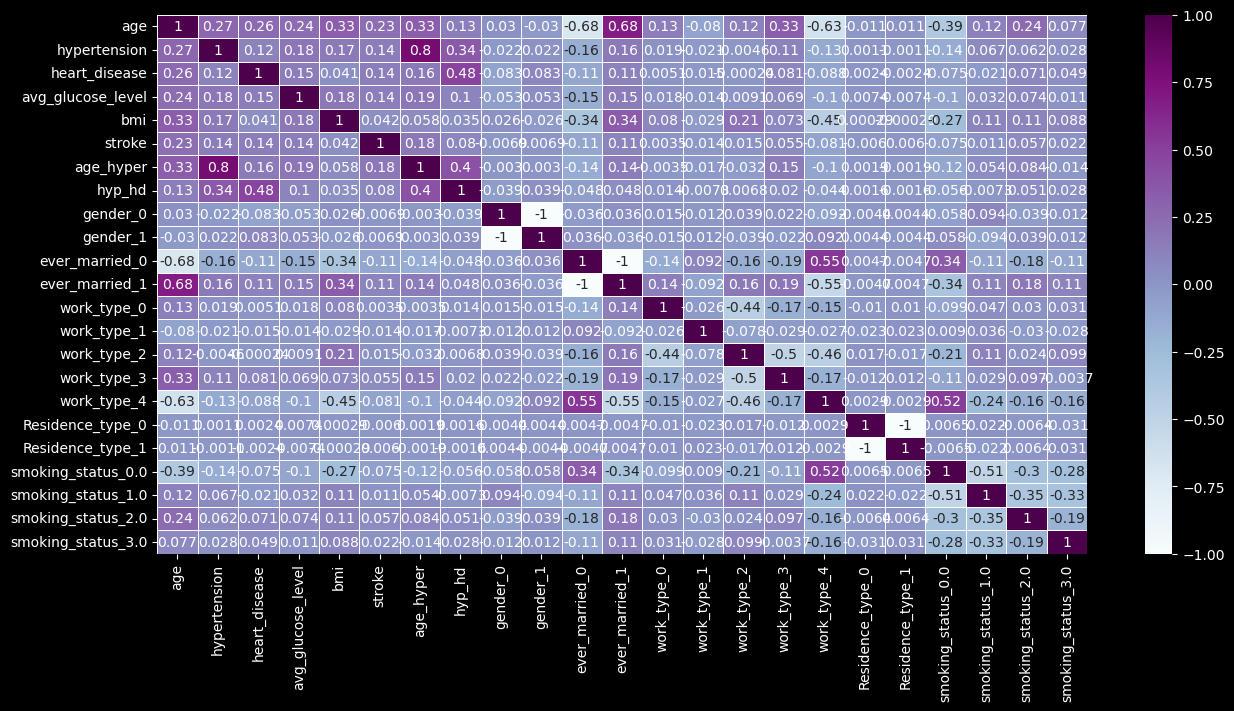

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,age_hyper,hyp_hd,gender_0,gender_1,...,work_type_1,work_type_2,work_type_3,work_type_4,Residence_type_0,Residence_type_1,smoking_status_0.0,smoking_status_1.0,smoking_status_2.0,smoking_status_3.0
0,1.070411,0,1,2.777797,0.981145,1,0.00000,0,False,True,...,False,True,False,False,False,True,False,False,True,False
2,1.647328,0,1,0.014016,0.459086,1,0.00000,0,False,True,...,False,True,False,False,True,False,False,True,False,False
3,0.271604,0,0,1.484266,0.701016,1,0.00000,0,True,False,...,False,True,False,False,False,True,False,False,False,True
4,1.602950,1,0,1.549325,-0.623231,1,1.60295,0,True,False,...,False,False,True,False,True,False,False,True,False,False
5,1.691706,0,0,1.821493,0.013426,1,0.00000,0,False,True,...,False,True,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,-1.326011,0,0,-0.049918,-1.310821,0,-0.00000,0,True,False,...,False,False,False,True,True,False,True,False,False,False
5106,1.691706,0,0,0.448045,1.414072,0,0.00000,0,True,False,...,False,False,True,False,False,True,False,True,False,False
5107,-0.349691,0,0,-0.502181,0.217156,0,-0.00000,0,True,False,...,False,False,True,False,True,False,False,True,False,False
5108,0.360360,0,0,1.373057,-0.419501,0,0.00000,0,False,True,...,False,True,False,False,True,False,False,False,True,False


In [576]:
plt.figure(figsize=(15,7))
sns.heatmap(df_linear.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()
df_linear

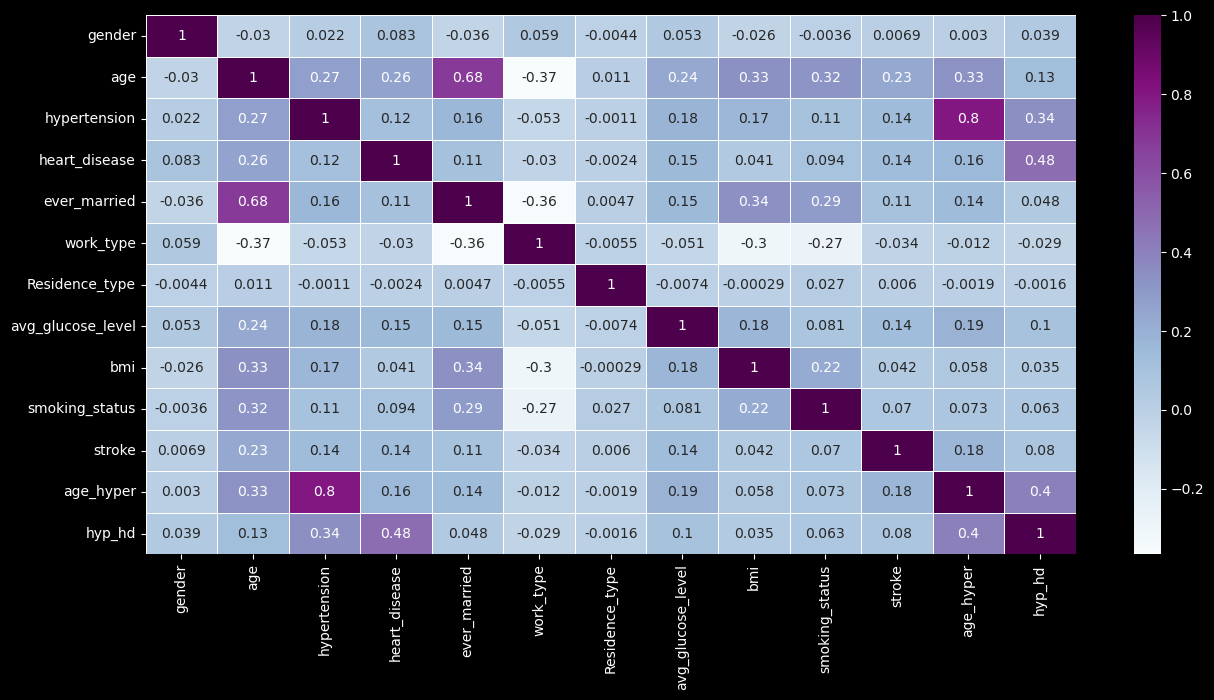

In [578]:
plt.figure(figsize=(15,7))
sns.heatmap(df_tree.corr(),annot=True,cmap='BuPu',linewidths=0.5)
plt.show()

In [580]:
print(df['stroke'].value_counts(normalize=True))

stroke
0    0.957416
1    0.042584
Name: proportion, dtype: float64


In [586]:
x_linear=df_linear.drop(columns=['stroke'])
y_linear=df_linear['stroke']
x_tree=df_tree.drop(columns=['stroke'])
y_tree=df_tree['stroke']

In [590]:
x_train_lin,x_test_lin,y_train_lin,y_test_lin=train_test_split(x_linear,y_linear,test_size=0.2,stratify=y_linear,random_state=42)
x_train_tree,x_test_tree,y_train_tree,y_test_tree=train_test_split(x_tree,y_tree,test_size=0.2,stratify=y_tree,random_state=42)

# Baseline Models

In [602]:
models_and_grids = {
    "RandomForest": (
        RandomForestClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "DecisionTree": (
        DecisionTreeClassifier(random_state=42),
        {'max_depth': [None, 10, 20],
         'min_samples_split': [2, 5],
         'class_weight': [None, 'balanced']}
    ),

    "GradientBoosting": (
        GradientBoostingClassifier(random_state=42),
        {'n_estimators': [100, 200],
         'learning_rate': [0.05, 0.1, 0.2],
         'max_depth': [3, 5]}
    ),

    "SVM": (
        SVC(probability=True, random_state=42),
        {'C': [1, 10],
         'kernel': ['linear', 'rbf'],
         'class_weight': [None, 'balanced']}
    ),

    "LogisticRegression": (
        LogisticRegression(max_iter=1000, random_state=42),
        {'C': [0.1, 1, 10],
         'penalty': ['l2'],
         'class_weight': [None, 'balanced']}
    ),

    "KNN": (
        KNeighborsClassifier(),
        {'n_neighbors': [3, 5, 7],
         'weights': ['uniform', 'distance']}
    )
}

# --------------------------
# 4. Train & evaluate
# --------------------------
results = {}
for name, (model, param_grid) in models_and_grids.items():
    print(f"\n🔍 Training {name}...")
    if name in ["SVM", "LogisticRegression", "KNN"]:
        Xtr, Xte = x_train_lin,x_test_lin
    else:
        Xtr, Xte = x_train_tree,x_test_tree

    grid = GridSearchCV(model, param_grid, cv=3, scoring='f1', n_jobs=-1)
    if name in ["SVM", "LogisticRegression", "KNN"]:
        grid.fit(Xtr, y_train_lin)
    else:
        grid.fit(Xtr,y_train_tree)
    y_pred = grid.best_estimator_.predict(Xte)

    print(f"✅ Best {name}: {grid.best_params_}")
    if name in ["SVM", "LogisticRegression", "KNN"]:
        print(classification_report(y_test_lin, y_pred, digits=3))
        results[name] = (grid.best_params_, classification_report(y_test_lin, y_pred, digits=3, output_dict=True))
    else:
        print(classification_report(y_test_tree, y_pred, digits=3))
        results[name] = (grid.best_params_, classification_report(y_test_tree, y_pred, digits=3, output_dict=True))


🔍 Training RandomForest...
✅ Best RandomForest: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
              precision    recall  f1-score   support

           0      0.962     0.937     0.949       940
           1      0.106     0.167     0.130        42

    accuracy                          0.904       982
   macro avg      0.534     0.552     0.539       982
weighted avg      0.925     0.904     0.914       982


🔍 Training DecisionTree...
✅ Best DecisionTree: {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0      0.970     0.834     0.897       940
           1      0.103     0.429     0.167        42

    accuracy                          0.817       982
   macro avg      0.537     0.631     0.532       982
weighted avg      0.933     0.817     0.866       982


🔍 Training GradientBoosting...
✅ Best GradientBoosting: {'learning_rate': 0.2, 'max_de

In [605]:
oversample=SMOTE()
x_train_lin_os,y_train_lin_os=oversample.fit_resample(x_train_lin,y_train_lin)
oversample=SMOTE()
x_train_tree_os,y_train_tree_os=oversample.fit_resample(x_train_tree,y_train_tree)

In [607]:
x_train_tree_os.shape

(7518, 12)

In [609]:
x_train_tree.shape

(3926, 12)

Classification Report (SMOTE + Logistic Regression):
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       940
           1       0.17      0.31      0.22        42

    accuracy                           0.91       982
   macro avg       0.57      0.62      0.58       982
weighted avg       0.93      0.91      0.92       982

Confusion Matrix:
[[876  64]
 [ 29  13]]
ROC-AUC: 0.7850303951367781


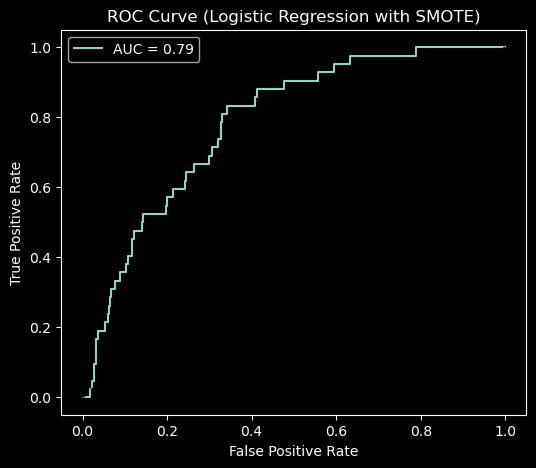

In [622]:
lr_model_smote=LogisticRegression(C=10,penalty='l2',class_weight='balanced')
lr_model_smote.fit(x_train_lin_os,y_train_lin_os)
y_pred_lr=lr_model_smote.predict(x_test_lin)
y_proba_lr=lr_model_smote.predict_proba(x_test_lin)[:,1]
print("Classification Report (SMOTE + Logistic Regression):")
print(classification_report(y_test_lin, y_pred_lr))

# ✅ Confusion matrix
cm = confusion_matrix(y_test_lin, y_pred_lr)
print("Confusion Matrix:")
print(cm)

# ✅ ROC-AUC score
roc_auc = roc_auc_score(y_test_lin,y_proba_lr)
print("ROC-AUC:", roc_auc)

# ✅ Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_lin, y_proba_lr)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Logistic Regression with SMOTE)")
plt.legend()
plt.show()

Classification Report (SMOTE + Logistic Regression):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       940
           1       0.14      0.21      0.17        42

    accuracy                           0.91       982
   macro avg       0.55      0.58      0.56       982
weighted avg       0.93      0.91      0.92       982

Confusion Matrix:
[[883  57]
 [ 33   9]]
ROC-AUC: 0.7569908814589666


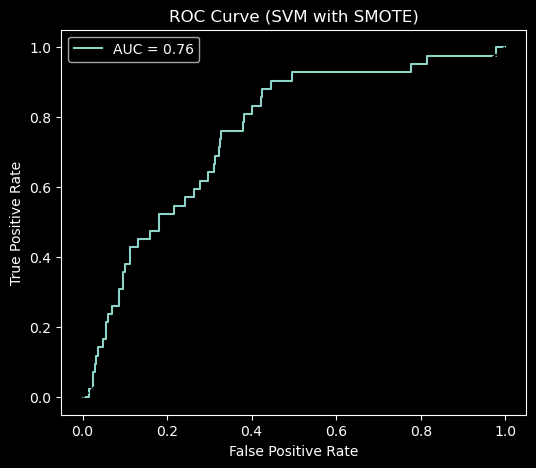

In [632]:
svm_model_smote=SVC(C=10,kernel='linear',class_weight='balanced',probability=True)
svm_model_smote.fit(x_train_lin_os,y_train_lin_os)
y_pred_svm=svm_model_smote.predict(x_test_lin)
y_proba_svm=svm_model_smote.predict_proba(x_test_lin)[:,1]
print("Classification Report (SMOTE + Logistic Regression):")
print(classification_report(y_test_lin, y_pred_svm))

# ✅ Confusion matrix
cm = confusion_matrix(y_test_lin, y_pred_svm)
print("Confusion Matrix:")
print(cm)

# ✅ ROC-AUC score
roc_auc = roc_auc_score(y_test_lin,y_proba_svm)
print("ROC-AUC:", roc_auc)

# ✅ Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test_lin, y_proba_svm)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (SVM with SMOTE)")
plt.legend()
plt.show()


=== KNN with SMOTE ===
              precision    recall  f1-score   support

           0       0.96      0.90      0.93       940
           1       0.05      0.12      0.07        42

    accuracy                           0.87       982
   macro avg       0.50      0.51      0.50       982
weighted avg       0.92      0.87      0.89       982

Confusion Matrix:
 [[846  94]
 [ 37   5]]
ROC-AUC: 0.6184777102330293


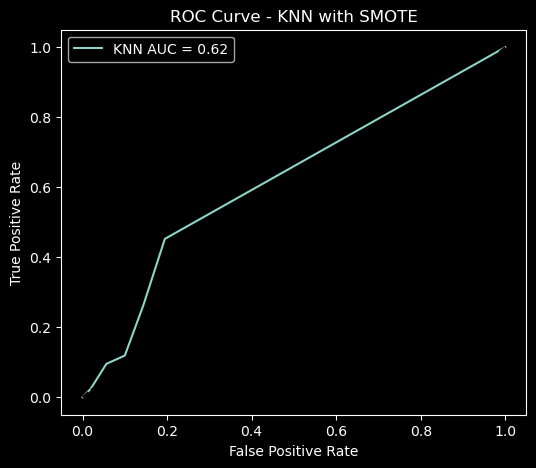

In [643]:
knn_model_smote=KNeighborsClassifier(n_neighbors=5)
knn_model_smote.fit(x_train_lin_os,y_train_lin_os)
y_pred_knn=knn_model_smote.predict(x_test_lin)
y_proba_knn=knn_model_smote.predict_proba(x_test_lin)[:,1]
print("\n=== KNN with SMOTE ===")
print(classification_report(y_test_lin, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test_lin, y_pred_knn))
print("ROC-AUC:", roc_auc_score(y_test_lin, y_proba_knn))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test_lin, y_proba_knn)
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"KNN AUC = {roc_auc_score(y_test_lin, y_proba_knn):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN with SMOTE")
plt.legend()
plt.show()

=== Classification Report (SMOTE + Random Forest) ===
              precision    recall  f1-score   support

           0       0.96      0.93      0.94       940
           1       0.11      0.21      0.15        42

    accuracy                           0.90       982
   macro avg       0.54      0.57      0.55       982
weighted avg       0.93      0.90      0.91       982

Confusion Matrix:
 [[870  70]
 [ 33   9]]
ROC-AUC: 0.7577507598784194


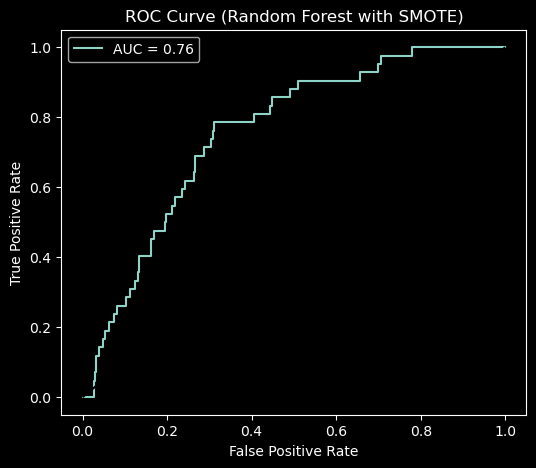

In [646]:
rf_model_smote = RandomForestClassifier(class_weight= 'balanced', max_depth= 10, min_samples_split= 5, n_estimators= 100)
rf_model_smote.fit(x_train_tree_os, y_train_tree_os)

y_pred_rf = rf_model_smote.predict(x_test_tree)
y_proba_rf = rf_model_smote.predict_proba(x_test_tree)[:,1]

print("=== Classification Report (SMOTE + Random Forest) ===")
print(classification_report(y_test_tree, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test_tree, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test_tree, y_proba_rf))

fpr, tpr, _ = roc_curve(y_test_tree, y_proba_rf)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_tree, y_proba_rf):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Random Forest with SMOTE)")
plt.legend()
plt.show()

=== Classification Report (SMOTE + Gradient Boosting) ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       940
           1       0.08      0.07      0.08        42

    accuracy                           0.93       982
   macro avg       0.52      0.52      0.52       982
weighted avg       0.92      0.93      0.92       982

Confusion Matrix:
 [[907  33]
 [ 39   3]]
ROC-AUC: 0.7548632218844985


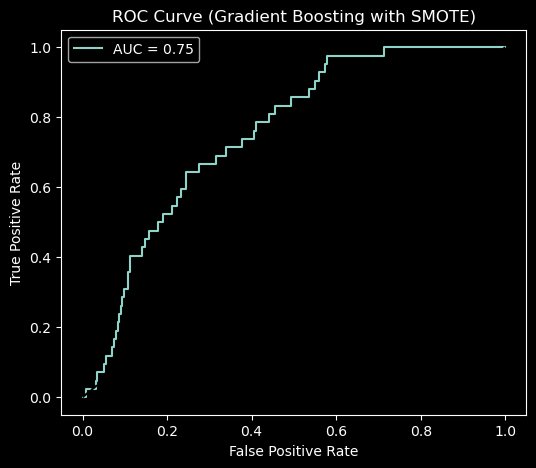

In [648]:
gb_model_smote = GradientBoostingClassifier(n_estimators=200, learning_rate=0.2, max_depth=3, random_state=42)
gb_model_smote.fit(x_train_tree_os, y_train_tree_os)

y_pred_gb = gb_model_smote.predict(x_test_tree)
y_proba_gb = gb_model_smote.predict_proba(x_test_tree)[:,1]

print("=== Classification Report (SMOTE + Gradient Boosting) ===")
print(classification_report(y_test_tree, y_pred_gb))
print("Confusion Matrix:\n", confusion_matrix(y_test_tree, y_pred_gb))
print("ROC-AUC:", roc_auc_score(y_test_tree, y_proba_gb))

fpr, tpr, _ = roc_curve(y_test_tree, y_proba_gb)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test_tree, y_proba_gb):.2f}")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Gradient Boosting with SMOTE)")
plt.legend()
plt.show()

# Voting Classifier

In [653]:
estimator=[]
estimator.append(('Linear Regression',lr_model_smote))
estimator.append(('SVM',svm_model_smote))
estimator.append(('KNN',knn_model_smote))
estimator.append(('Random Forest',rf_model_smote))
estimator.append(('Gradient Boosting',gb_model_smote))

In [655]:
VC_hard=VotingClassifier(estimators=estimator,voting='hard')
VC_hard

VotingClassifier(estimators=[('Linear Regression',
                              LogisticRegression(C=10,
                                                 class_weight='balanced')),
                             ('SVM',
                              SVC(C=10, class_weight='balanced',
                                  kernel='linear', probability=True)),
                             ('KNN', KNeighborsClassifier()),
                             ('Random Forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     min_samples_split=5)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         n_estimators=200,
                                                         random_state=42))])

In [657]:
VC_hard.fit(x_train_lin_os,y_train_lin_os)
# ✅ Predictions
y_pred_vc = VC_hard.predict(x_test_lin)

# ✅ Classification Report
print("Classification Report (Voting Classifier - Hard):")
print(classification_report(y_test_lin, y_pred_vc))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test_lin, y_pred_vc)
print("Confusion Matrix:")
print(cm)

Classification Report (Voting Classifier - Hard):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       940
           1       0.12      0.19      0.15        42

    accuracy                           0.91       982
   macro avg       0.54      0.56      0.55       982
weighted avg       0.93      0.91      0.92       982

Confusion Matrix:
[[883  57]
 [ 34   8]]


In [661]:
VC_soft=VotingClassifier(estimators=estimator,voting='soft')
VC_soft

VotingClassifier(estimators=[('Linear Regression',
                              LogisticRegression(C=10,
                                                 class_weight='balanced')),
                             ('SVM',
                              SVC(C=10, class_weight='balanced',
                                  kernel='linear', probability=True)),
                             ('KNN', KNeighborsClassifier()),
                             ('Random Forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     max_depth=10,
                                                     min_samples_split=5)),
                             ('Gradient Boosting',
                              GradientBoostingClassifier(learning_rate=0.2,
                                                         n_estimators=200,
                                                         random_state=42))],
                 voting='soft')

In [663]:
VC_soft.fit(x_train_lin_os,y_train_lin_os)
# ✅ Predictions
y_pred_vc = VC_soft.predict(x_test_lin)

# ✅ Classification Report
print("Classification Report (Voting Classifier - Hard):")
print(classification_report(y_test_lin, y_pred_vc))

# ✅ Confusion Matrix
cm = confusion_matrix(y_test_lin, y_pred_vc)
print("Confusion Matrix:")
print(cm)

Classification Report (Voting Classifier - Hard):
              precision    recall  f1-score   support

           0       0.96      0.94      0.95       940
           1       0.07      0.10      0.08        42

    accuracy                           0.91       982
   macro avg       0.51      0.52      0.51       982
weighted avg       0.92      0.91      0.91       982

Confusion Matrix:
[[885  55]
 [ 38   4]]
